## Probability & Statistics

###　代表値・統計量
データ分析において、最初に確認すべき量
* 平均値（mean）：　データの合計をデータ数で割ったもの
* 中央値(median)：　 データを大きさ順に並べて中央に位置するデータ値
* 分散：　対象のデータが平均からどれだけばらつきがあるか。
* 標準偏差：　分散の平方根

#### 平均値・中央値・標準偏差の計算

In [1]:
import numpy as np

# 外れ値なし
x = [3, 4, 5, 3, 4, 5, 3, 4, 5]
print("外れ値なしの数値のリスト")
print("平均値：", np.mean(x))
print("中央値：", np.median(x))
print("標準偏差", np.std(x))
# 外れ値あり
x = [3, 4, 5, 3, 4, 5, 3, 4, 5, 100]
print("外れ値なしの数値のリスト")
print("平均値：", np.mean(x))
print("中央値：", np.median(x))
print("標準偏差", np.std(x))

外れ値なしの数値のリスト
平均値： 4.0
中央値： 4.0
標準偏差 0.816496580927726
外れ値なしの数値のリスト
平均値： 13.6
中央値： 4.0
標準偏差 28.810414783546594


#### 売り上げ金額と気温の散布図

MEMO 大小関係がない値をカテゴリ変数と呼ぶ

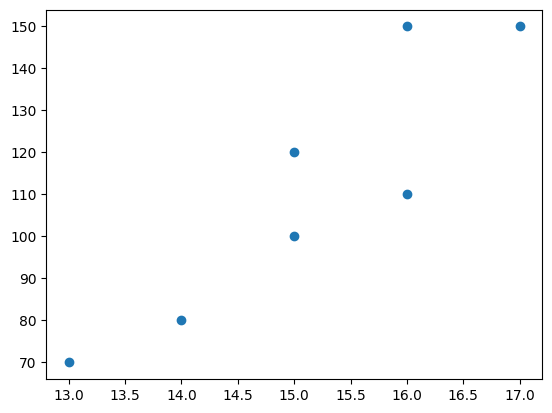

In [2]:
import matplotlib.pyplot as plt

# 気温と売り上げの一週間分の記録を保持したリスト
pair_list = [(15, 120), (14, 80), (17, 150), (16, 150), (16, 110), (15, 100), (13, 70)]

# 売り上げ金額を縦軸、気温を横軸とした散布図（scatter plot）
plt.scatter([x for x, y in pair_list], [y for x, y in pair_list])

Memo 気温と売り上げ金額は比例関係にありそうということがわかる

#### 相関係数
$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$

In [3]:
# 相関係数の計算
x_i = [x for x, y in pair_list]
y_i = [y for x, y in pair_list]
x_bar = np.mean(x_i)
y_bar = np.mean(y_i)
# 分子
numerator = np.sum([(x - x_bar) * (y - y_bar) for x, y in pair_list])
# 分母
denominator1 = np.sqrt(np.sum([(x - x_bar) ** 2 for x in x_i]))

denominator2 = np.sqrt(np.sum([(y - y_bar) ** 2 for y in y_i]))

r_xy = numerator / (denominator1 * denominator2)
r_xy

0.9042001578168488

### 確率と確率分布

(array([ 999676., 1000539.,  999760.,  999786., 1002038.,  998712.,
        1000697.,  999619., 1000584.,  998589.]),
 array([1.09406048e-07, 1.00000084e-01, 2.00000058e-01, 3.00000033e-01,
        4.00000007e-01, 4.99999981e-01, 5.99999956e-01, 6.99999930e-01,
        7.99999905e-01, 8.99999879e-01, 9.99999854e-01]),
 <BarContainer object of 10 artists>)

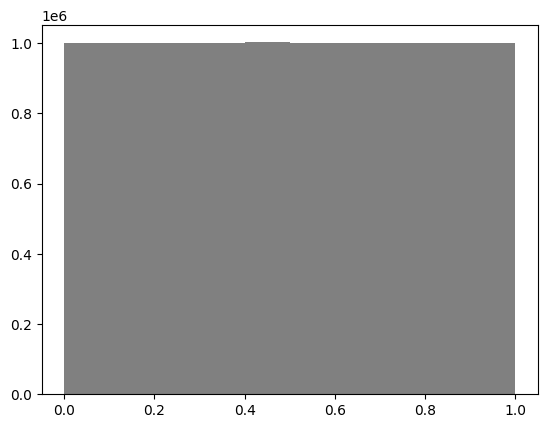

In [4]:
# 一様分布からの擬似乱数の発生
plt.hist(np.random.random(10000000), color="gray")

#### 確率変数
* 離散確率変数
    * ベルヌーイ分布
* 連続確率変数
    * 一様分布
    * 正規分布

(array([ 11.,  38.,  87., 172., 258., 237., 127.,  53.,  13.,   4.]),
 array([452. , 462.2, 472.4, 482.6, 492.8, 503. , 513.2, 523.4, 533.6,
        543.8, 554. ]),
 <BarContainer object of 10 artists>)

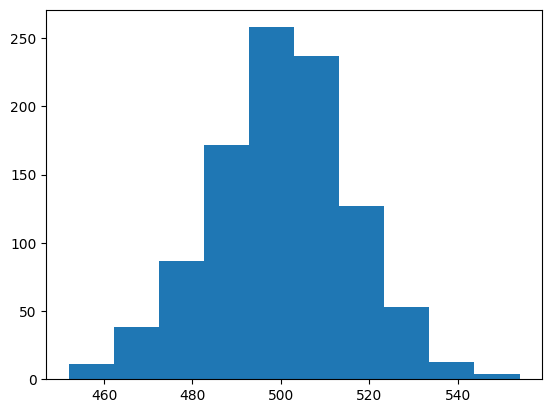

In [5]:
# コインで表が出る数の分布
all_sum = list()
n = 1000  # 　試行回数

for _ in range(1000):
    sum_ = 0
    for _ in range(n):
        sum_ += (
            np.random.random() > 0.5
        )  # 一様乱数を閾値(p:0.5)で切って「離散化」することでベルヌーイ試行を実現している
    all_sum.append(sum_)
plt.hist(all_sum)

(array([483., 251., 119.,  60.,  47.,  18.,  11.,   4.,   4.,   3.]),
 array([   0. ,  642.1, 1284.2, 1926.3, 2568.4, 3210.5, 3852.6, 4494.7,
        5136.8, 5778.9, 6421. ]),
 <BarContainer object of 10 artists>)

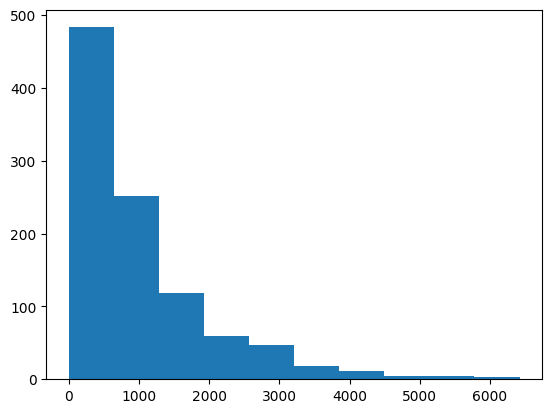

In [6]:
# 毎回確率が0.001で当たるクジを最大10000回引く時、何回目で当たりを引くかの分布
all_sum = list()
for _ in range(1000):
    for i in range(10000):
        if np.random.random() < 0.001:
            all_sum.append(i)
            break

plt.hist(all_sum)

(array([ 15.,  37., 106., 157., 237., 186., 167.,  65.,  24.,   6.]),
 array([-2.83873762, -2.24877748, -1.65881735, -1.06885721, -0.47889707,
         0.11106306,  0.7010232 ,  1.29098334,  1.88094347,  2.47090361,
         3.06086375]),
 <BarContainer object of 10 artists>)

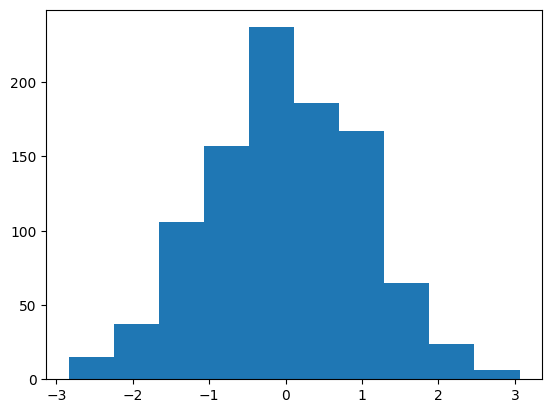

In [9]:
# 正規分布　平均値を中心に左右対称になる（物理的な世界でよく現れる分布らしい）
plt.hist(
    np.random.normal(size=1000)
)  # 標準正規分布に従う乱数を指定された数（この場合は1000個）生成

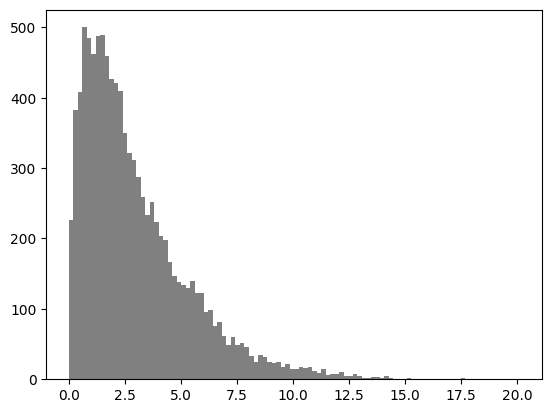

In [15]:
""" カイ二乗分布に従うサンプルのヒストグラム
正規分布に従う確率変数を２乗したものをk個足しわせたものをカイ二乗分布という。
"""

N = 10000
plt.hist(
    np.random.normal(size=N) ** 2
    + np.random.normal(size=N) ** 2
    + np.random.normal(size=N) ** 2,
    bins=100,  # ヒストグラムの棒の数
    color="gray",
)

plt.show()

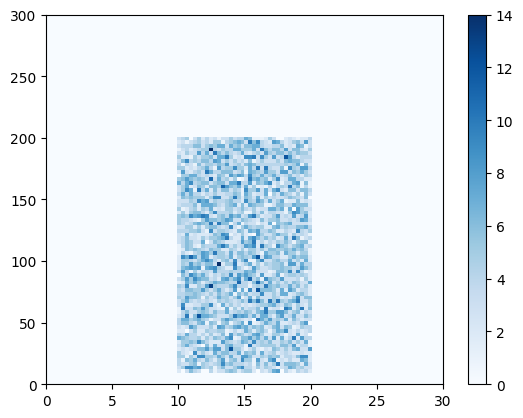

In [5]:
# 2変数の独立な一様分布からのサンプル
import matplotlib.pyplot as plt
import numpy as np

# 気温(10から20までの数値をランダムに含む、長さ10000の配列を生成)
x = np.random.uniform(low=10, high=20, size=10000)
# 売上金額(10から200までの数値をランダムに含む、長さ10000の配列を生成)
y = np.random.uniform(10, 200, size=10000)

plt.hist2d(x, y, bins=100, range=[[0, 30], [0, 300]], cmap="Blues")

plt.colorbar()

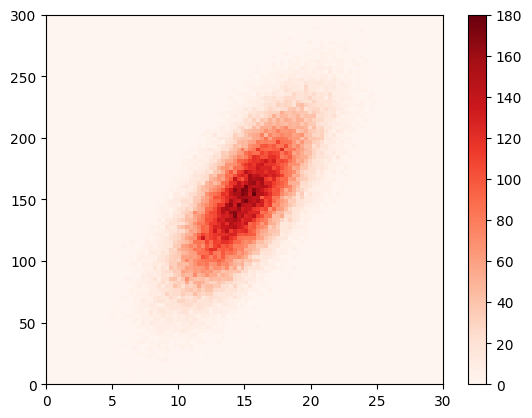

In [13]:
# 2変数の独立な一様分布からのサンプル
import matplotlib.pyplot as plt
import numpy as np

# 気温(平均が15で標準偏差が3の正規分布からランダムに抽出された100,000個の数値を含む配列)
x = np.random.normal(loc=15, scale=3, size=100000)
# 　誤差項
e = np.random.normal(loc=0, scale=30, size=100000)
# 売上金額
"""
気温と売上金額の間の線形関係を定義。
気温xに対する売上金額yの関係は、気温が1℃上昇するごとに売上が10単位増加すると仮定。
加えて、e（誤差項）によって、この線形関係にバリエーション（ばらつき）を加えることで
実際のデータにより近い形のシミュレーションをしている
"""
y = 10 * x + e

plt.hist2d(x, y, bins=100, range=[[0, 30], [0, 300]], cmap="Reds")

plt.colorbar()

In [14]:
# 二つの独立なサイコロを投げた時の結果
import seaborn as sns 

dice = [1,2,3,4,5,6]


ModuleNotFoundError: No module named 'seaborn'